In [78]:
library(ggplot2)   # plotting
install.packages("msm")
library(msm)
library(tidyverse)
library(tidyr)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [81]:
n=1000
set.seed(1984)
df <- data.frame( 
    p0 =  runif(n, min=2, max=15),               #    1h
    p1 =  runif(n, min=2, max=15),               #   10h
    p2 =  runif(n, min=2, max=15),               #  100h
    p3 =  runif(n, min=20, max=70),              #  herb
    p4 =  runif(n, min=60, max=100),             # 1000h
    p5 = rtnorm(n, mean=12.83, sd=6.25, 0, 150), #    ws
    p6 =  runif(n, min=0, max=360),              #    wd
    p7 =  runif(n, min=30, max=50),              #    th
    p8 =  runif(n, min=30, max=100),             #    hh
    p9 =  runif(n, min=0, max=2)                 #   adj
)
integerColumns <- sapply(format(subset(df, select=p0:p8), format="d", digits=0, scientific = FALSE), as.integer)
decimalColumns <- sapply(format(subset(df, select=p9), format="d", digits=2, scientific = FALSE), as.double)
individuals <- as.data.frame(cbind(integerColumns, decimalColumns), col)
individuals$id <- 1:nrow(individuals)
params <- c("1h", "10h", "100h", "herb", "1000h", "ws", "wd", "th", "hh")
colnames(individuals) <- params
head(individuals)

1h,10h,100h,herb,1000h,ws,wd,th,hh,NA,NA
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
11,6,13,66,78,11,88,35,50,1.22711,1
8,8,8,30,95,7,48,37,63,1.73018,2
7,4,3,57,98,5,182,43,67,0.80682,3
6,7,4,43,62,11,101,39,78,1.89390,4
12,8,15,67,91,12,176,37,88,1.00594,5
13,3,14,51,90,16,124,46,63,1.90027,6


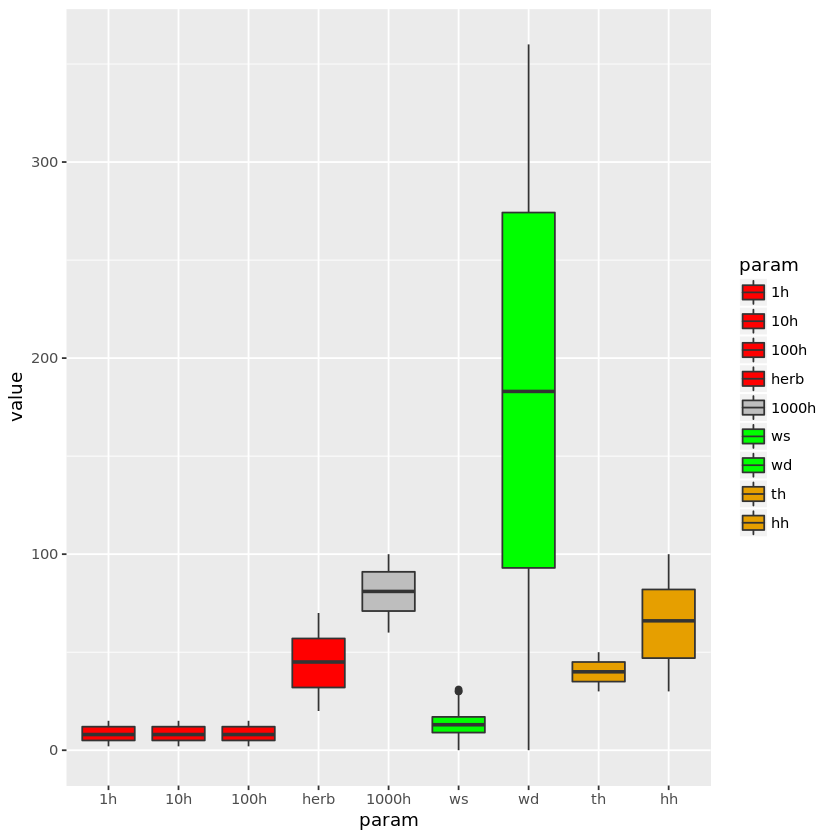

In [82]:
individuals.long <- gather(individuals, param, value, params, factor_key=TRUE)
fmsColor <- "red";
windColor <- "green";
weatherColor <- "#e69f00"
bp <- ggplot(individuals.long, aes(x=param, y=value, fill=param)) + geom_boxplot()
bp + scale_fill_manual(values=c(fmsColor, fmsColor, fmsColor, fmsColor, "grey", windColor, windColor, weatherColor, weatherColor))

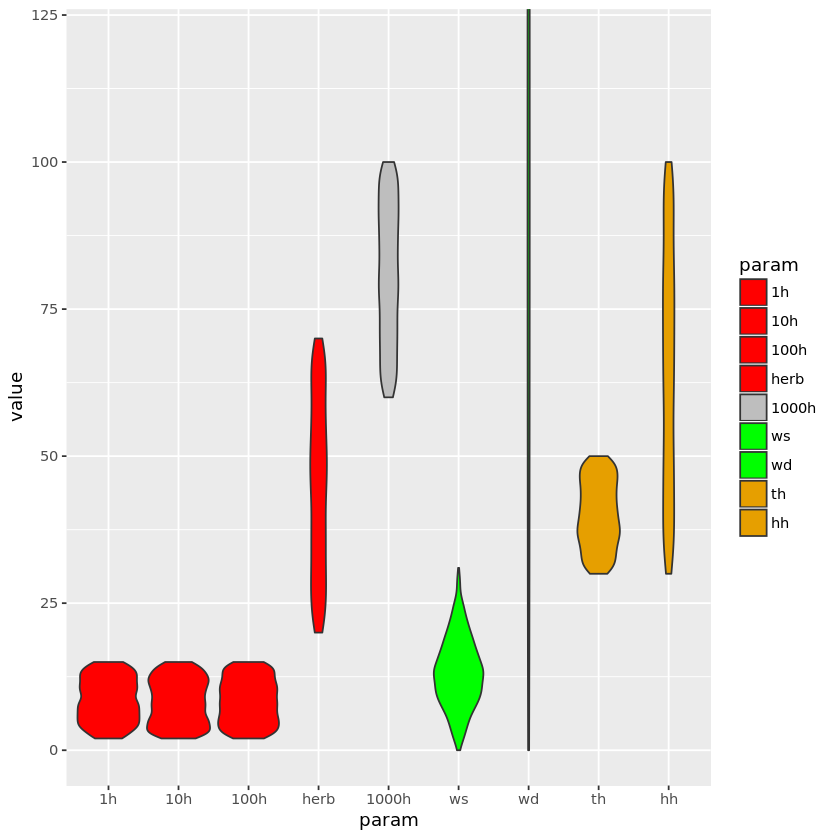

In [83]:
ggplot(individuals.long, aes(x=param, y=value, fill=param)) + 
    geom_violin() +
    scale_fill_manual(values=c(fmsColor, fmsColor, fmsColor, fmsColor, "grey", windColor, windColor, weatherColor, weatherColor,"grey")) +
    coord_cartesian(ylim = c(0, 120))